### Feature Engineering - 1

## 1

Min-max scaling is used to limit the datapoints in the range of 0 to 1.
It will be done through the minmaxscaler in the preprocessing.

In [1]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
minmax= MinMaxScaler()

In [18]:
import numpy as np

# Example data
data = np.array([[1.0, 2.0],
                 [2.0, 3.0],
                 [3.0, 4.0]])


In [20]:
minmax.fit(data)

MinMaxScaler()

In [21]:
minmax.transform(data)

array([[0. , 0. ],
       [0.5, 0.5],
       [1. , 1. ]])

## 2 

Unit vector scaling focuses on maintaining the direction of the data points by ensuring they have a magnitude of 1. In contrast, Min-Max scaling is concerned with scaling the data to a specific range (e.g., between 0 and 1).

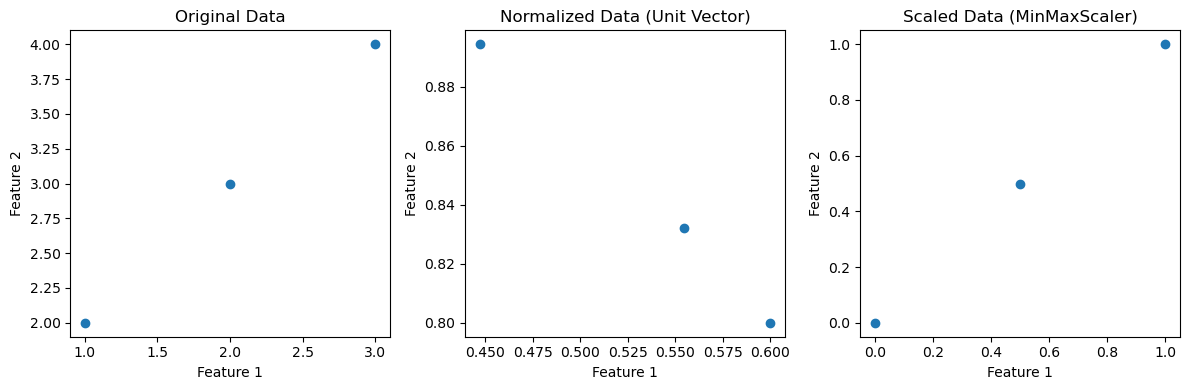

In [22]:
from sklearn.preprocessing import Normalizer, MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example data
data = np.array([[1.0, 2.0],
                 [2.0, 3.0],
                 [3.0, 4.0]])

# Create a Normalizer
normalizer = Normalizer(norm='l2')  # 'l2' indicates Euclidean norm

# Create a MinMaxScaler
scaler = MinMaxScaler()

# Normalize the data using Normalizer
data_normalized = normalizer.transform(data)

# Scale the data using MinMaxScaler
data_scaled = scaler.fit_transform(data)

# Convert to pandas DataFrame for better visualization
df_original = pd.DataFrame(data, columns=['Feature 1', 'Feature 2'])
df_normalized = pd.DataFrame(data_normalized, columns=['Feature 1', 'Feature 2'])
df_scaled = pd.DataFrame(data_scaled, columns=['Feature 1', 'Feature 2'])

# Plot the original, normalized, and scaled data
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(df_original['Feature 1'], df_original['Feature 2'])
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 3, 2)
plt.scatter(df_normalized['Feature 1'], df_normalized['Feature 2'])
plt.title('Normalized Data (Unit Vector)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 3, 3)
plt.scatter(df_scaled['Feature 1'], df_scaled['Feature 2'])
plt.title('Scaled Data (MinMaxScaler)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()


### 3

PCA = It will make the fit line to occupied the more data points and reduce dimensility with this practice. 

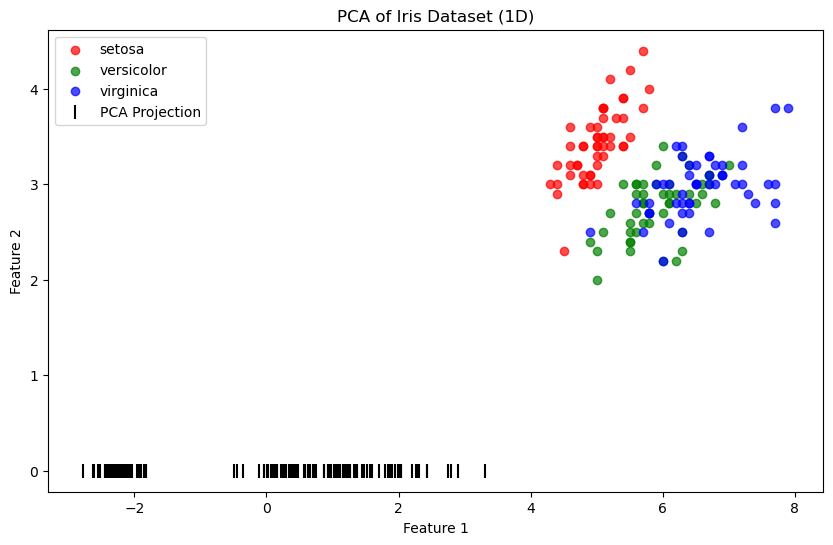

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the features (mean=0 and variance=1)
X_std = StandardScaler().fit_transform(X)

# Apply PCA with one component
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_std)

# Create a DataFrame for visualization
import pandas as pd
df_pca = pd.DataFrame(data=X_pca, columns=['Principal Component 1'])
df_pca['Target'] = y

# Visualize the data in the new feature space
plt.figure(figsize=(10, 6))
targets = [0, 1, 2]
colors = ['r', 'g', 'b']

# Plot original data points
for target, color in zip(targets, colors):
    indices_to_keep = y == target
    plt.scatter(X[indices_to_keep, 0], X[indices_to_keep, 1], c=color, label=iris.target_names[target], alpha=0.7)

# Plot projections onto the first principal component
plt.scatter(df_pca['Principal Component 1'], np.zeros_like(df_pca['Principal Component 1']),
            c='black', marker='|', label='PCA Projection', s=100)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('PCA of Iris Dataset (1D)')
plt.legend()
plt.show()



## 4

Principal Component Analysis (PCA) is a technique often used for feature extraction in the field of dimensionality reduction. Feature extraction aims to transform the original set of features into a new set of features that captures the most important information in the data while reducing its dimensionality. PCA achieves this by finding the principal components, which are linear combinations of the original features.

Here's the relationship between PCA and feature extraction:

Dimensionality Reduction: One of the primary goals of feature extraction is to reduce the dimensionality of the dataset. PCA achieves this by transforming the data into a new set of uncorrelated variables called principal components.

Variance Retention: PCA identifies the directions (principal components) along which the data varies the most. It orders these components by the amount of variance they capture. By selecting a subset of the top principal components, you retain most of the important information in the data while discarding less informative components.

Linear Transformation: PCA performs a linear transformation of the original feature space into a new space defined by the principal components. Each principal component is a linear combination of the original features, and the new features are orthogonal to each other.

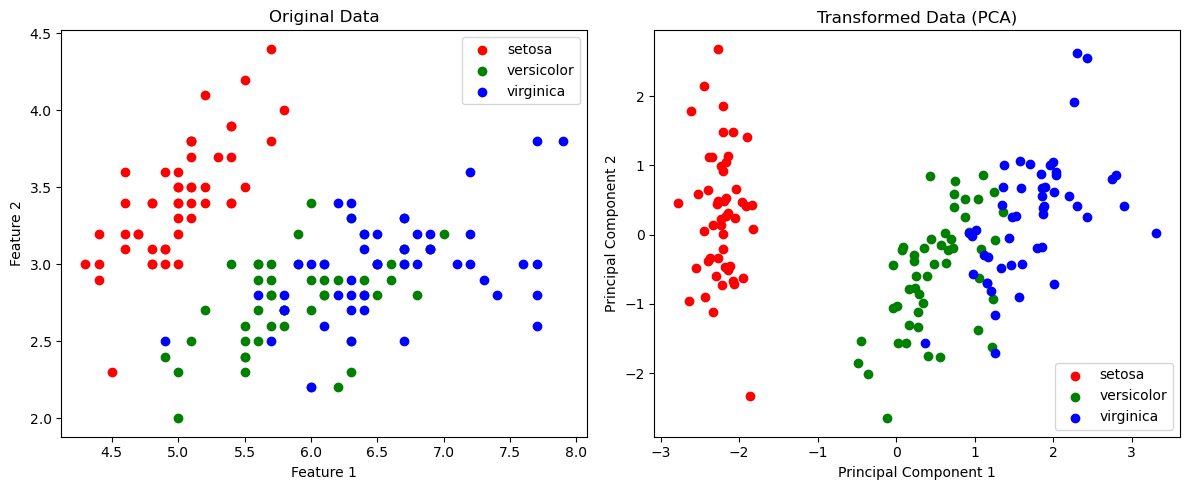

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the features (mean=0 and variance=1)
X_std = StandardScaler().fit_transform(X)

# Apply PCA to reduce to 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Visualize the original and transformed data
plt.figure(figsize=(12, 5))

# Plot original data
plt.subplot(1, 2, 1)
for target, color in zip(range(3), ['r', 'g', 'b']):
    indices_to_keep = y == target
    plt.scatter(X[indices_to_keep, 0], X[indices_to_keep, 1], c=color, label=iris.target_names[target])

plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Plot transformed data after PCA
plt.subplot(1, 2, 2)
for target, color in zip(range(3), ['r', 'g', 'b']):
    indices_to_keep = y == target
    plt.scatter(X_pca[indices_to_keep, 0], X_pca[indices_to_keep, 1], c=color, label=iris.target_names[target])

plt.title('Transformed Data (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.tight_layout()
plt.show()


## 5 

Min-Max scaling is a normalization technique commonly used in data preprocessing for recommendation systems, among other applications. The purpose of Min-Max scaling is to scale numerical features to a specific range, usually between 0 and 1, ensuring that all features contribute equally to the analysis. In the context of building a recommendation system for a food delivery service with features like price, rating, and delivery time, here's how you could use Min-Max scaling:

Understand the Features:

Price: The cost of the food items.
Rating: The user ratings for the restaurants or food items.
Delivery Time: The time taken for the delivery.
Importance of Scaling:

Features may have different units or scales. For instance, the price could be in dollars, rating may range from 1 to 5, and delivery time might be in minutes. Scaling ensures that all these features are on a similar scale, preventing one feature from dominating others during analysis.

The scaled data will have all features within the range [0, 1]. This ensures that each feature contributes proportionally to the recommendation system, regardless of their original scales.


## 6

Principal Component Analysis (PCA) is a dimensionality reduction technique that can be beneficial in the context of predicting stock prices when dealing with a dataset containing numerous features. The primary goal of PCA is to transform the original features into a new set of uncorrelated variables called principal components while retaining the most critical information in the data. 
Here's how you could use PCA to reduce the dimensionality of your stock price prediction dataset :

Understand the Features:

Your dataset likely includes a variety of features, such as financial indicators (e.g., revenue, earnings, debt), market trends, and other relevant metrics that could impact stock prices.
Standardize the Data:

It's crucial to standardize the data before applying PCA to ensure that all features are on the same scale. This involves subtracting the mean and dividing by the standard deviation for each feature.
Apply PCA:

Use the scikit-learn library (or another PCA implementation) to apply PCA to your standardized dataset. Specify the number of components you want to retain. Often, you might choose a number that explains a significant portion of the variance in the data (e.g., 95% or 99%).

## 7

In [28]:
import numpy as np

# Original dataset
data = np.array([1, 5, 10, 15, 20])

# Define the new range
new_min = -1
new_max = 1

# Calculate Min-Max scaling
min_value = np.min(data)
max_value = np.max(data)

scaled_data = ((data - min_value) / (max_value - min_value)) * (new_max - new_min) + new_min

print("Original Data:", data)
print("Min-Max Scaled Data ([-1, 1]):", scaled_data)


Original Data: [ 1  5 10 15 20]
Min-Max Scaled Data ([-1, 1]): [-1.         -0.57894737 -0.05263158  0.47368421  1.        ]


## 8

The decision on how many principal components to retain in PCA involves analyzing the explained variance. Explained variance tells us the proportion of the dataset's total variance that is captured by each principal component. By examining the cumulative explained variance, we can determine how much information is retained when using a specific number of principal components and whenever threshold reaches for the explained cumulative, then we will consider only those features only